#  Análisis Exploratorio de Datos
## Clasificación de Niveles de Obesidad - Regresión Ordinal

**Problema**: Regresión Ordinal con 7 clases ordenadas de niveles de obesidad


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración para mejorar la visualización
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print(" Librerías importadas correctamente")


 Librerías importadas correctamente


### Carga del Dataset

In [65]:
# Cargar el dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Mostrar información básica del dataset
print(f" Dataset cargado exitosamente")
print(f"  - Número de filas: {len(df)}")
print(f"  - Número de columnas: {len(df.columns)}")
print(f"\nPrimeras 5 filas del dataset:")
df.head()


 Dataset cargado exitosamente
  - Número de filas: 2111
  - Número de columnas: 17

Primeras 5 filas del dataset:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [66]:
# Información general del dataset
print("Información general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  F

### Variable objetivo

Identificamos la columna que contiene las clases de obesidad (`NObeyesdad`)

### Clases de Obesidad

El problema tiene 7 clases ordenadas (regresión ordinal):
1. Insufficient_Weight
2. Normal_Weight
3. Overweight_Level_I
4. Overweight_Level_II
5. Obesity_Type_I
6. Obesity_Type_II
7. Obesity_Type_III


In [67]:
# La variable objetivo es 'NObeyesdad'
target_column = 'NObeyesdad'

# Verificar que la columna existe
if target_column in df.columns:
    print(f" Variable objetivo encontrada: '{target_column}'")
    print(f"  - Tipo de datos: {df[target_column].dtype}")
    print(f"  - Valores únicos: {df[target_column].nunique()}")
    print(f"\nClases de obesidad encontradas:")
    print(df[target_column].unique())
else:
    print(f" Error: La columna '{target_column}' no existe en el dataset")
    print(f"Columnas disponibles: {list(df.columns)}")


 Variable objetivo encontrada: 'NObeyesdad'
  - Tipo de datos: object
  - Valores únicos: 7

Clases de obesidad encontradas:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### Análisis de la distribución de clases

### Métricas de Desbalance

**Ratio de Desbalance (IR - Imbalance Ratio)**:
- Fórmula: `IR = tamaño_clase_mayoritaria / tamaño_clase_minoritaria`
- Interpretación:
  - IR < 2: Balanceado 
  - IR 2-5: Desbalanceo leve ️
  - IR 5-10: Desbalanceo moderado ️️
  - IR > 10: Desbalanceo severo 

In [68]:
# Contar la frecuencia de cada clase
distribucion = df[target_column].value_counts().sort_index()

# Calcular porcentajes
porcentajes = (df[target_column].value_counts(normalize=True) * 100).sort_index()

# Crear un DataFrame con la información
distribucion_df = pd.DataFrame({
    'Clase': distribucion.index,
    'Cantidad': distribucion.values,
    'Porcentaje': porcentajes.values
})

print("=" * 80)
print("DISTRIBUCIÓN DE CLASES DE OBESIDAD")
print("=" * 80)
print(distribucion_df.to_string(index=False))


DISTRIBUCIÓN DE CLASES DE OBESIDAD
              Clase  Cantidad  Porcentaje
Insufficient_Weight       272   12.884889
      Normal_Weight       287   13.595452
     Obesity_Type_I       351   16.627191
    Obesity_Type_II       297   14.069162
   Obesity_Type_III       324   15.348176
 Overweight_Level_I       290   13.737565
Overweight_Level_II       290   13.737565


In [69]:
# Estadísticas adicionales
print("\n" + "=" * 80)
print("ESTADÍSTICAS DEL DESBALANCE")
print("=" * 80)
print(f"Total de registros: {len(df)}")
print(f"Número de clases: {len(distribucion)}")
print(f"Clase con MÁS registros: {distribucion.idxmax()} ({distribucion.max()} registros)")
print(f"Clase con MENOS registros: {distribucion.idxmin()} ({distribucion.min()} registros)")

# Calcular el ratio de desbalance (Imbalance Ratio - IR)
# IR = tamaño de la clase mayoritaria / tamaño de la clase minoritaria
clase_mayoritaria = distribucion.max()
clase_minoritaria = distribucion.min()
imbalance_ratio = clase_mayoritaria / clase_minoritaria

print(f"\nRatio de Desbalance (IR): {imbalance_ratio:.2f}")
print(f"  - Esto significa que la clase mayoritaria tiene {imbalance_ratio:.2f}x más registros")
print(f"  - que la clase minoritaria")

# Clasificar el nivel de desbalance
if imbalance_ratio < 2:
    nivel = "BALANCEADO"
elif imbalance_ratio < 5:
    nivel = "DESBALANCEO LEVE"
elif imbalance_ratio < 10:
    nivel = "DESBALANCEO MODERADO"
else:
    nivel = "DESBALANCEO SEVERO"

print(f"\nNivel de desbalance: {nivel}")



ESTADÍSTICAS DEL DESBALANCE
Total de registros: 2111
Número de clases: 7
Clase con MÁS registros: Obesity_Type_I (351 registros)
Clase con MENOS registros: Insufficient_Weight (272 registros)

Ratio de Desbalance (IR): 1.29
  - Esto significa que la clase mayoritaria tiene 1.29x más registros
  - que la clase minoritaria

Nivel de desbalance: BALANCEADO


### Visualizaciones de la distribución

 Visualizaciones guardadas en: results/figuras/01_distribucion_clases_obesidad.png


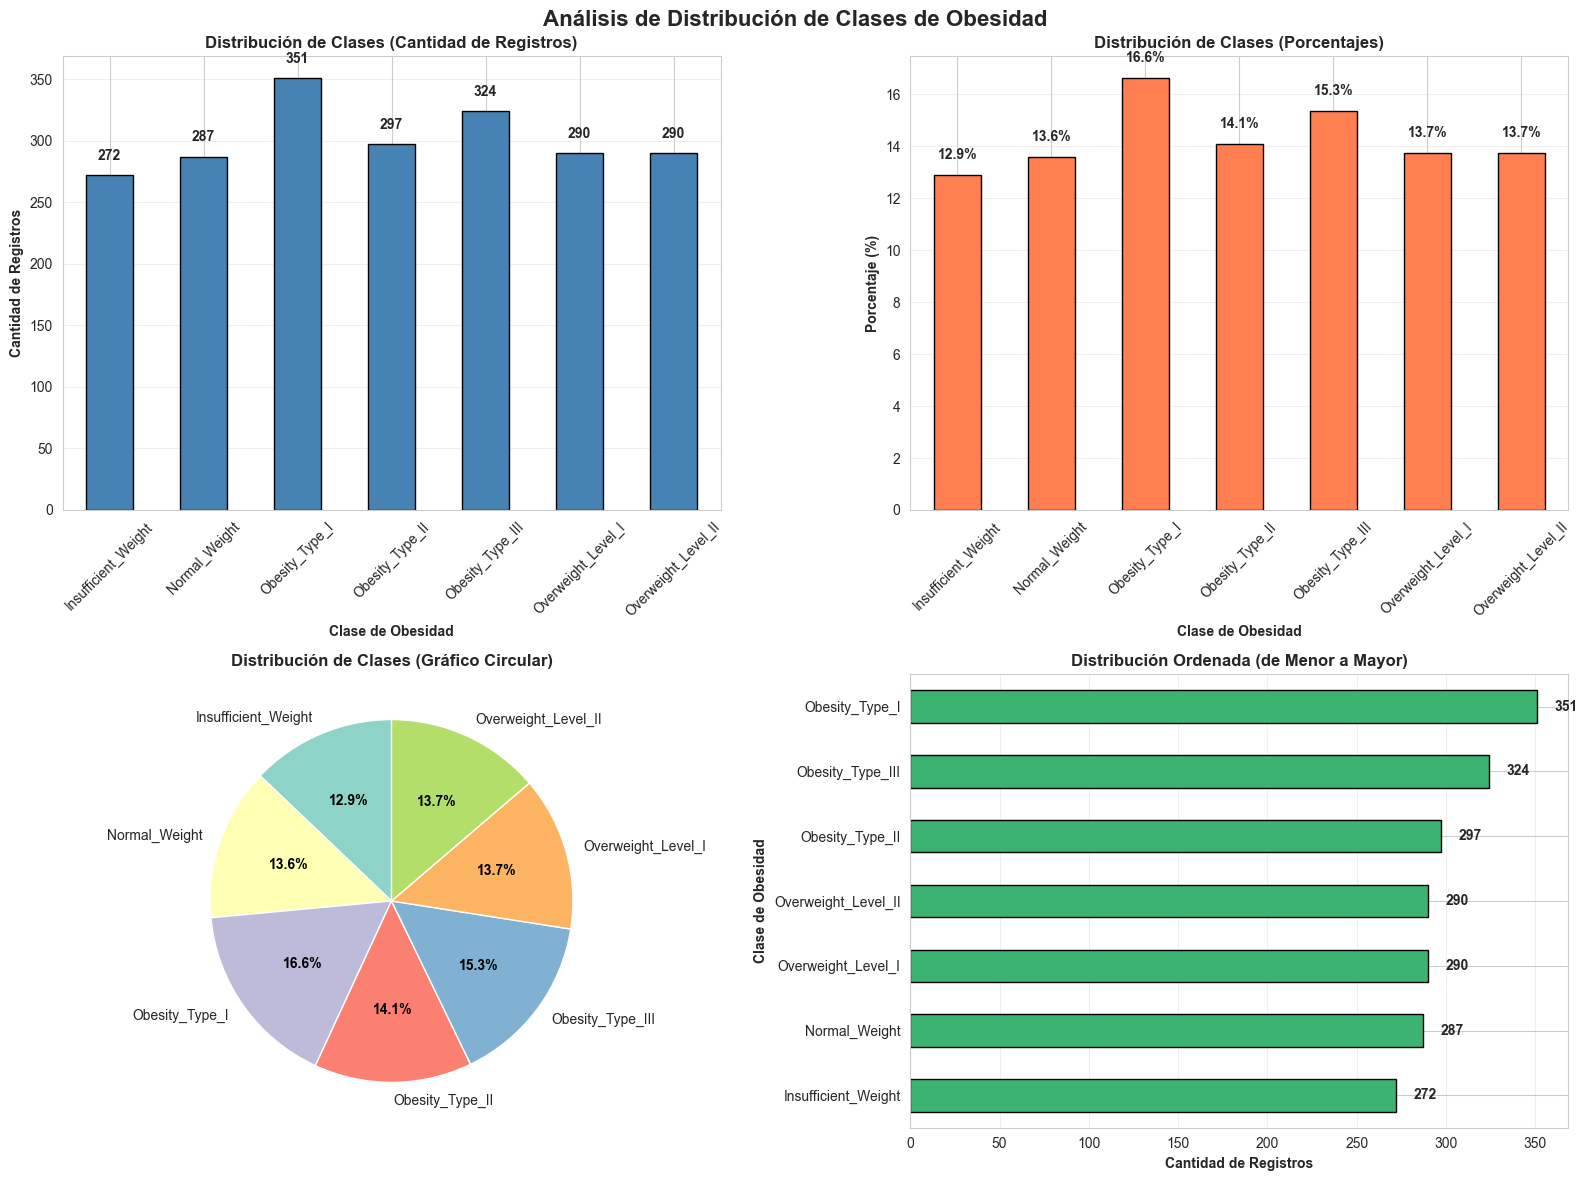

In [70]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Distribución de Clases de Obesidad', fontsize=16, fontweight='bold')

# 1. Gráfico de barras - Cantidad de registros por clase
ax1 = axes[0, 0]
distribucion.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Distribución de Clases (Cantidad de Registros)', fontweight='bold')
ax1.set_xlabel('Clase de Obesidad', fontweight='bold')
ax1.set_ylabel('Cantidad de Registros', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(distribucion.values):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Gráfico de barras - Porcentajes
ax2 = axes[0, 1]
porcentajes.plot(kind='bar', ax=ax2, color='coral', edgecolor='black')
ax2.set_title('Distribución de Clases (Porcentajes)', fontweight='bold')
ax2.set_xlabel('Clase de Obesidad', fontweight='bold')
ax2.set_ylabel('Porcentaje (%)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(porcentajes.values):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Gráfico de pastel (pie chart)
ax3 = axes[1, 0]
colors = sns.color_palette("Set3", len(distribucion))
wedges, texts, autotexts = ax3.pie(distribucion.values, 
                                    labels=distribucion.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    startangle=90)
ax3.set_title('Distribución de Clases (Gráfico Circular)', fontweight='bold')

# Mejorar la legibilidad del gráfico de pastel
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# 4. Gráfico de barras horizontal ordenado
ax4 = axes[1, 1]
distribucion_sorted = distribucion.sort_values(ascending=True)
distribucion_sorted.plot(kind='barh', ax=ax4, color='mediumseagreen', edgecolor='black')
ax4.set_title('Distribución Ordenada (de Menor a Mayor)', fontweight='bold')
ax4.set_xlabel('Cantidad de Registros', fontweight='bold')
ax4.set_ylabel('Clase de Obesidad', fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(distribucion_sorted.values):
    ax4.text(v + 10, i, str(v), ha='left', va='center', fontweight='bold')

plt.tight_layout()

# Guardar la figura
nombre_archivo = 'results/figuras/01_distribucion_clases_obesidad.png'
import os
os.makedirs('results/figuras', exist_ok=True)
plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
print(f" Visualizaciones guardadas en: {nombre_archivo}")

# Mostrar el gráfico
plt.show()
